In [8]:
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
%matplotlib inline
rng = np.random

N = 400
feats = 784

D = (rng.randn(N, feats), rng.randint(size=N, low=0, high=2))
training_steps = 10000

# declare Theano vars
x = T.dmatrix("X")
y = T.vector("y")

# initialize weight vector and bias
w = theano.shared(rng.randn(feats), name="w")
b = theano.shared(0., name="b")

print("Initial Model:")
print("b: {}\nw: {}".format(b.get_value().shape, w.get_value().shape))

p_1 = 1 / (1 + T.exp(-T.dot(x, w) - b))
preds = p_1 > 0.5
xent = -y * T.log(p_1) - (1-y) * T.log(1 - p_1)
cost = xent.mean() + 0.01 * (w ** 2).sum()

p_2 = T.nnet.softmax(T.dot(x, w) + b)
preds2 = p_1 > 0.5
xent2 = -y * T.log(p_1) - (1-y) * T.log(1 - p_1)

gw, gb = T.grad(cost, [w, b])

train = theano.function(
            inputs=[x,y],
            outputs=[preds, xent],
            updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[x], outputs=preds)
train2 = theano.function([x,y],[preds, xent], updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict_sm = theano.function([x], p_2)
# train
E = []
for i in range(training_steps):
    pred, err = train(D[0], D[1])
    E.append(err.mean())

print("Final model:")
print("b:", b.get_value().shape)
print("w:", w.get_value().shape)
print("target values for D:")
print(D[1])
print("prediction on D:")
print(predict(D[0]))
print("softmax")
print(np.round(predict_sm(D[0]),2))

Initial Model:
b: ()
w: (784,)
Final model:
b: ()
w: (784,)
target values for D:
[0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0
 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1]
prediction on D:
[0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 

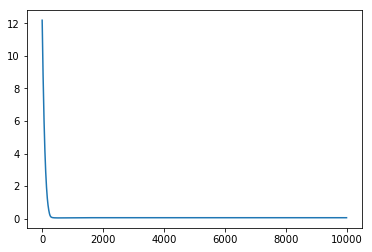

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(E)

In [10]:
# declare Theano vars
x = T.dmatrix("X")
y = T.vector("y")

# initialize weight vector and bias
w = theano.shared(rng.randn(feats), name="w")
b = theano.shared(0., name="b")

p_2 = 1 / (1 + T.exp(-T.dot(x, w) - b))
preds2 = p_2 > 0.5
mse = 0.5*T.sqr(y - p_2)
cost2 = mse.mean() + 0.01 * (w ** 2).sum()

gw, gb = T.grad(cost2, [w, b])

train = theano.function(
            inputs=[x,y],
            outputs=[preds2, mse],
            updates=((w, w - 0.1 * gw), (b, b - 0.1 * gb)))
predict = theano.function(inputs=[x], outputs=preds2)
predict_proba = theano.function(inputs=[x], outputs=p_2)

# train
E = []
for i in range(training_steps):
    pred, err = train(D[0], D[1])
    E.append(err.mean())

print("target values for D:")
print(D[1])
print("prediction on D:")
print(predict(D[0]))

target values for D:
[0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1
 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1
 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 0
 1 1 1 0 0 0 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 1
 0 1 1 1 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 1 0 1 1 1 0 0
 0 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 1
 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1
 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1
 1 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 0 0 1 1
 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1]
prediction on D:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

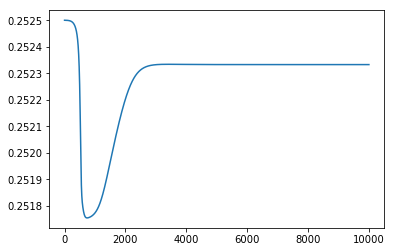

In [11]:
plt.plot(E)